Este conjunto de datos obtiene el precio de casas expresado por unidad de area. Los datos contienen la fecha de la última transacción sobre la propiedad, la edad de la casa, la distancia a la estación de metro más cercana, la cantidad de tiendas cercanas, latitud y longitud.

In [76]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from IPython.display import Image  
scaler = StandardScaler()

In [60]:
realstate = pd.read_csv("real_state.csv")
realstate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.9166667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.9166667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.5833333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.5,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.8333333,5.0,390.56840,5,24.97937,121.54245,43.1


In [33]:
data = realstate.values[:,2:7]
'''
data2 = []
# Se recorre la columna fecha de transaccion y se guarda el valor en i
for i in data[:,0]:
    # Reemplaza cada valor y lo agrega al arreglo data2
    data2.append(i.replace(",", "."))
# Guardar cada valor en la columna
data[:,0] = data2
'''
data_columns = list(realstate.columns.values[2:7])
target=realstate.values[:,7]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,27.5,394.017,7,24.9731,121.54
1,17.7,451.642,8,24.9694,121.545
2,16.4,289.325,5,24.982,121.543
3,12.5,561.985,5,24.9875,121.544
4,37.3,587.888,8,24.9708,121.546


In [65]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pd.DataFrame(X_train).head()

array([[-6.65501483e-01,  1.16403501e+00, -6.39929919e-02,
        -1.18473053e-01, -1.02419987e-01],
       [-1.47200718e+00, -5.47066385e-01,  6.20969032e-01,
        -1.18470947e-01, -1.02417763e-01],
       [-7.95583048e-01,  1.79189356e+00, -1.43391704e+00,
        -1.18474744e-01, -1.02415701e-01],
       [-1.79863644e-01,  2.54298744e+00, -1.43391704e+00,
        -1.18478747e-01, -1.02420808e-01],
       [-1.56740033e+00, -5.47005267e-01, -1.09143603e+00,
        -1.18467830e-01, -1.02418600e-01],
       [-2.92600999e-01,  7.57682091e-01, -7.48955016e-01,
        -1.18471373e-01, -1.02419746e-01],
       [ 1.09226504e-02, -5.45557219e-01, -4.06474004e-01,
        -1.18471880e-01, -1.02420069e-01],
       [-4.31354668e-01,  3.37947327e-01, -6.39929919e-02,
        -1.18462081e-01, -1.02418318e-01],
       [-3.24378710e-02, -5.46946878e-01, -1.09143603e+00,
        -1.18467610e-01, -1.02418552e-01],
       [ 1.06024727e+00,  2.88020994e+00, -1.09143603e+00,
        -1.18476593e-01

### Definir y entrenar regresor

In [55]:
mlp = MLPRegressor(max_iter=10000,
                   hidden_layer_sizes=(30,15),
                   activation='logistic',
                   learning_rate_init=0.03,
                   verbose = True
                   )
mlp.fit(X_train, y_train)

Iteration 1, loss = 819.81527435
Iteration 2, loss = 776.03260296
Iteration 3, loss = 741.97526678
Iteration 4, loss = 716.61357207
Iteration 5, loss = 695.53485279
Iteration 6, loss = 676.99281589
Iteration 7, loss = 658.76059909
Iteration 8, loss = 640.15717871
Iteration 9, loss = 620.00698439
Iteration 10, loss = 598.63511661
Iteration 11, loss = 577.31050319
Iteration 12, loss = 555.92535027
Iteration 13, loss = 535.86391397
Iteration 14, loss = 516.75587981
Iteration 15, loss = 498.71115632
Iteration 16, loss = 481.27229962
Iteration 17, loss = 464.01678506
Iteration 18, loss = 447.68444185
Iteration 19, loss = 431.64413056
Iteration 20, loss = 415.96720258
Iteration 21, loss = 401.26623771
Iteration 22, loss = 386.54908622
Iteration 23, loss = 372.68563646
Iteration 24, loss = 359.03552078
Iteration 25, loss = 346.31468165
Iteration 26, loss = 333.74061953
Iteration 27, loss = 321.70914173
Iteration 28, loss = 310.12347004
Iteration 29, loss = 299.07895415
Iteration 30, loss = 28

Iteration 376, loss = 29.07442144
Iteration 377, loss = 29.01225441
Iteration 378, loss = 29.02142726
Iteration 379, loss = 28.99450260
Iteration 380, loss = 28.90884740
Iteration 381, loss = 28.90759219
Iteration 382, loss = 28.95047183
Iteration 383, loss = 28.92033365
Iteration 384, loss = 28.95332794
Iteration 385, loss = 28.92485411
Iteration 386, loss = 28.96136366
Iteration 387, loss = 28.95246187
Iteration 388, loss = 28.86264412
Iteration 389, loss = 28.82269827
Iteration 390, loss = 28.87445991
Iteration 391, loss = 28.90804676
Iteration 392, loss = 28.80777859
Iteration 393, loss = 28.77217581
Iteration 394, loss = 28.78211111
Iteration 395, loss = 28.77405728
Iteration 396, loss = 28.69319723
Iteration 397, loss = 28.73742063
Iteration 398, loss = 28.71781252
Iteration 399, loss = 28.69886455
Iteration 400, loss = 28.67596410
Iteration 401, loss = 28.70797081
Iteration 402, loss = 28.63222265
Iteration 403, loss = 28.63042689
Iteration 404, loss = 28.61805348
Iteration 405,

Iteration 752, loss = 18.81244860
Iteration 753, loss = 18.88368984
Iteration 754, loss = 18.66476020
Iteration 755, loss = 18.66012868
Iteration 756, loss = 18.81613289
Iteration 757, loss = 18.76149662
Iteration 758, loss = 18.64868707
Iteration 759, loss = 18.66744976
Iteration 760, loss = 18.65873747
Iteration 761, loss = 18.61055273
Iteration 762, loss = 18.65075347
Iteration 763, loss = 18.61943774
Iteration 764, loss = 18.72758818
Iteration 765, loss = 18.52699786
Iteration 766, loss = 18.59298140
Iteration 767, loss = 18.58966640
Iteration 768, loss = 18.49605631
Iteration 769, loss = 18.58752435
Iteration 770, loss = 18.51658200
Iteration 771, loss = 18.44720829
Iteration 772, loss = 18.48708551
Iteration 773, loss = 18.59119228
Iteration 774, loss = 18.32906094
Iteration 775, loss = 18.47219715
Iteration 776, loss = 18.40710610
Iteration 777, loss = 18.40941261
Iteration 778, loss = 18.28898093
Iteration 779, loss = 18.36409863
Iteration 780, loss = 18.30322828
Iteration 781,

MLPRegressor(activation='logistic', hidden_layer_sizes=(30, 15),
             learning_rate_init=0.03, max_iter=10000, verbose=True)

### Evaluar error obtenido

In [56]:
y_pred = mlp.predict(X_test)
error = metrics.mean_squared_error(y_test,y_pred)
print(error)

97.9697917613302


### Prueba

Predecir y comparar el resultado para 10 valores cualquiera del conjunto de prueba
- ¿Qué diferencia existe entre el valor obtenido del real?
- Predecir los mismos valores utilizando un árbol de decisión. ¿Cuál método se adapta mejor a los datos?

In [66]:
for i in range(0,10):
    aux = random.randrange(0, len(X_test)-1)
    X_sample = X_test[aux]
    y_sample = y_test[aux]
    y_pred = mlp.predict(X_sample.reshape(1, -1))
    print("La progresión de la enfermedad en un año es de "+str(y_pred[0]))
    print("La progresión real de la enfermedad es "+str(y_sample))

La progresión de la enfermedad en un año es de 37.889058138722845
La progresión real de la enfermedad es 38.1
La progresión de la enfermedad en un año es de 38.67974386390031
La progresión real de la enfermedad es 37.8
La progresión de la enfermedad en un año es de 26.562293570595173
La progresión real de la enfermedad es 23.8
La progresión de la enfermedad en un año es de 37.99873173636606
La progresión real de la enfermedad es 36.8
La progresión de la enfermedad en un año es de 34.77288657468372
La progresión real de la enfermedad es 32.5
La progresión de la enfermedad en un año es de 40.2937417849171
La progresión real de la enfermedad es 33.1
La progresión de la enfermedad en un año es de 42.48325893901095
La progresión real de la enfermedad es 40.3
La progresión de la enfermedad en un año es de 17.201521344161474
La progresión real de la enfermedad es 15.5
La progresión de la enfermedad en un año es de 53.12760507492456
La progresión real de la enfermedad es 43.1
La progresión de 

La diferencia entre el valor real y el de la predicción es mínima.

In [70]:
reg = DecisionTreeRegressor(max_depth=4)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [74]:
y_predmlp = []
y_predreg = []
y_sample = []
for i in range(0,10):
    aux = random.randrange(0, len(X_test)-1)
    X_sample = X_test[aux]
    y_sample.append(y_test[aux])
    y_predmlp.append(mlp.predict(X_sample.reshape(1, -1)))
    y_predreg.append(reg.predict(X_sample.reshape(1, -1)))
    print("La progresión de la enfermedad según red neuronal en un año es de "+str(y_predmlp[i]))
    print("La progresión de la enfermedad según arbol de decisión en un año es de "+str(y_predreg[i]))
    print("La progresión real de la enfermedad es "+str(y_sample[i])+"\n")

La progresión de la enfermedad según red neuronal en un año es de [54.87380244]
La progresión de la enfermedad según arbol de decisión en un año es de [59.04705882]
La progresión real de la enfermedad es 58.0

La progresión de la enfermedad según red neuronal en un año es de [50.82171968]
La progresión de la enfermedad según arbol de decisión en un año es de [44.52413793]
La progresión real de la enfermedad es 47.9

La progresión de la enfermedad según red neuronal en un año es de [26.56229357]
La progresión de la enfermedad según arbol de decisión en un año es de [26.4627451]
La progresión real de la enfermedad es 23.8

La progresión de la enfermedad según red neuronal en un año es de [49.97051461]
La progresión de la enfermedad según arbol de decisión en un año es de [36.73793103]
La progresión real de la enfermedad es 40.8

La progresión de la enfermedad según red neuronal en un año es de [54.11295999]
La progresión de la enfermedad según arbol de decisión en un año es de [59.047058

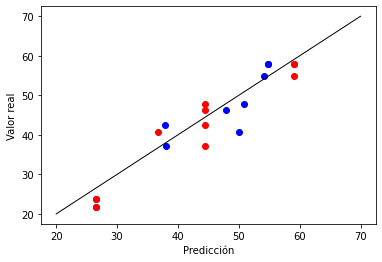

In [81]:
plt.scatter(y_predmlp, y_sample, color = 'blue')
plt.scatter(y_predreg, y_sample, color = 'red')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.plot([20,70],[20,70], 'black', linewidth=1)
plt.show()

Según el gráfico de predicciones del árbol y de la red, ambas presentan resultados aceptables comparados con los valores reales.